In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [4]:
all_popular = pd.read_csv('all_popular_csv.csv')
spain = pd.read_csv('spain_summer_songs.csv')

danceability


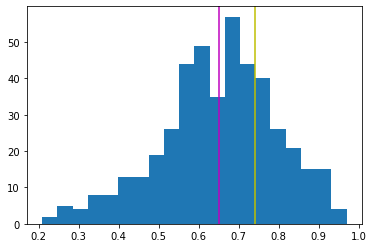

energy


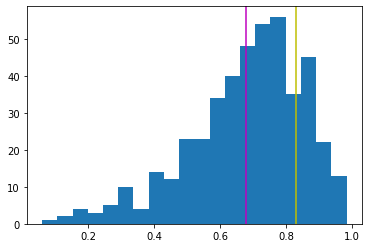

key


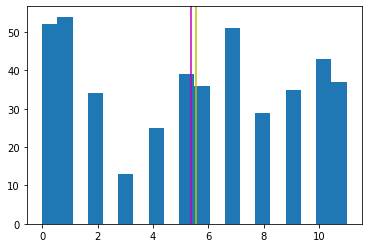

loudness


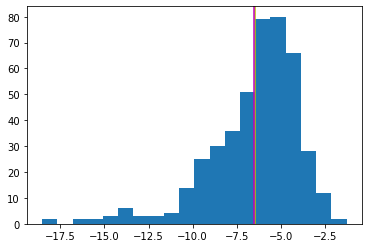

mode


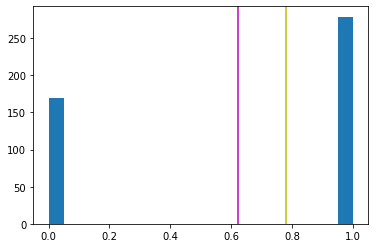

speechiness


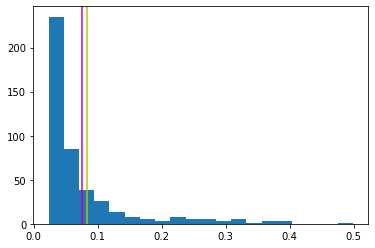

liveness


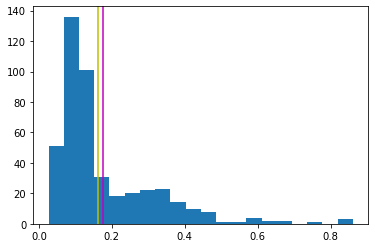

valence


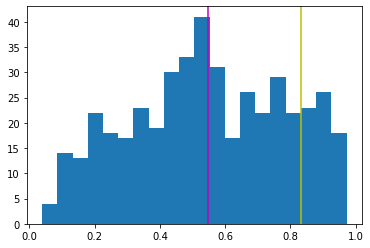

tempo


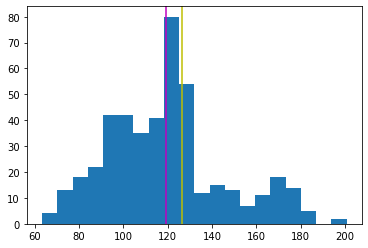

In [5]:
spain_feat = spain[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]
all_popular_feat = all_popular[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]

list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']


for feat in list:
    print(feat)
    plt.axvline(x=spain_feat[feat].mean(), color='y', linestyle='-')
    plt.axvline(x=all_popular_feat[feat].mean(), color='m', linestyle='-')
    plt.hist(all_popular_feat[feat], bins=20)
    plt.show()

In [17]:
# danceability, energy, loudness, liveness, valence, tempo

#H0 : mu of features spain = mu of features popular
#H1 : mu of features spain != mu of features popular

alpha = 0.05

list = ['danceability', 'energy', 'loudness', 'liveness', 'mode', 'valence', 'tempo']
for feat in list:
    print(feat)
    _, p_value = st.ttest_ind(spain_feat[feat], all_popular_feat[feat], equal_var=False)
    print(_, p_value)
    print(p_value<alpha, '\n')


## we reject the null hypothesis for danceability, energy, and valence, so we can say with 95% confidence that these features
# are significantly  different in our selected spanish summer hits than in the generally popular songs set.

danceability
4.435866098459822 7.157313403127343e-05
True 

energy
6.199793395856607 2.5885858879437507e-07
True 

loudness
0.07479082040970564 0.9408167985279403
False 

liveness
-0.4117073266866171 0.6831537675712909
False 

mode
2.0394765421743766 0.048558637731806194
True 

valence
10.83144823409055 2.913488003841558e-14
True 

tempo
1.5927643257237205 0.11987729896797804
False 



In [15]:
spain = pd.read_csv('spain_songs_final.csv')


In [18]:
# danceability, energy, valence

#H0 : Characteristics of Summer hits in Spain = since the 90s
#H1 : Characteristics of Summer hits in Spain != since the 90s

In [19]:
anova_table = spain[['decades','danceability','energy','valence']].sort_values(by= 'decades')

In [20]:
from scipy.stats import f_oneway

alpha = 0.05

stat, p_value = f_oneway(anova_table[anova_table['decades'] == '1990s']['danceability'],
anova_table[anova_table['decades'] == '2000s']['danceability'],
anova_table[anova_table['decades'] == '2010s']['danceability'],
anova_table[anova_table['decades'] == '2020s']['danceability'])

p_value < alpha

# they are similar for danceability // cannot reject the null


False

In [21]:
stat, p_value = f_oneway(anova_table[anova_table['decades'] == '1990s']['valence'],
anova_table[anova_table['decades'] == '2000s']['valence'],
anova_table[anova_table['decades'] == '2010s']['valence'],
anova_table[anova_table['decades'] == '2020s']['valence'])

p_value < alpha

# they are similar for valence // cannot reject the null

False

In [22]:
anova_table[anova_table['decades'] == '1990s']['energy']
anova_table[anova_table['decades'] == '2000s']['energy']
anova_table[anova_table['decades'] == '2010s']['energy']
anova_table[anova_table['decades'] == '2020s']['energy']

p_value < alpha

# they are similar for energy // cannot reject the null

False